In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

df = pd.read_csv("C:/Users/test/_climate_change_mitigation/data/processed/berlin_all_imputed_clean.csv")

df = df[['energy_consumption','type', 'rent', 'utilities_cost', 'heating_cost', 'cost_total', 'area',
       'rooms', 'pets', 'condition', 'quality_of_appliances', 'heating_type',
       'energy_certificate_type', 'ground_plan', 'year_built',
       'last_renovated', 'latitude', 'longitude', 'description_location',
       'description_misc', 'energy_sources', 'bedrooms', 'bathrooms',
       'floor_act', 'floor_max', 'city_code',
       'description_clear', 'equipment_clear', 'parking_spaces',
       'parking_kind', 'hot_water_included']]

In [128]:
text = ['description_misc','description_clear','equipment_clear']

categorials = ['type','pets','condition','quality_of_appliances',
                'heating_type','energy_certificate_type','ground_plan',
                'energy_sources','parking_kind','hot_water_included',
                'city_code']

numericals = ['energy_consumption','rent','utilities_cost','heating_cost','cost_total',
                'area','rooms','bedrooms','bathrooms','year_built',
                'last_renovated','latitude','longitude','floor_act',
                'floor_max','parking_spaces']

df_num = df[numericals]
df_cat = df[categorials]
df_no_text = df.drop(text, axis=1)

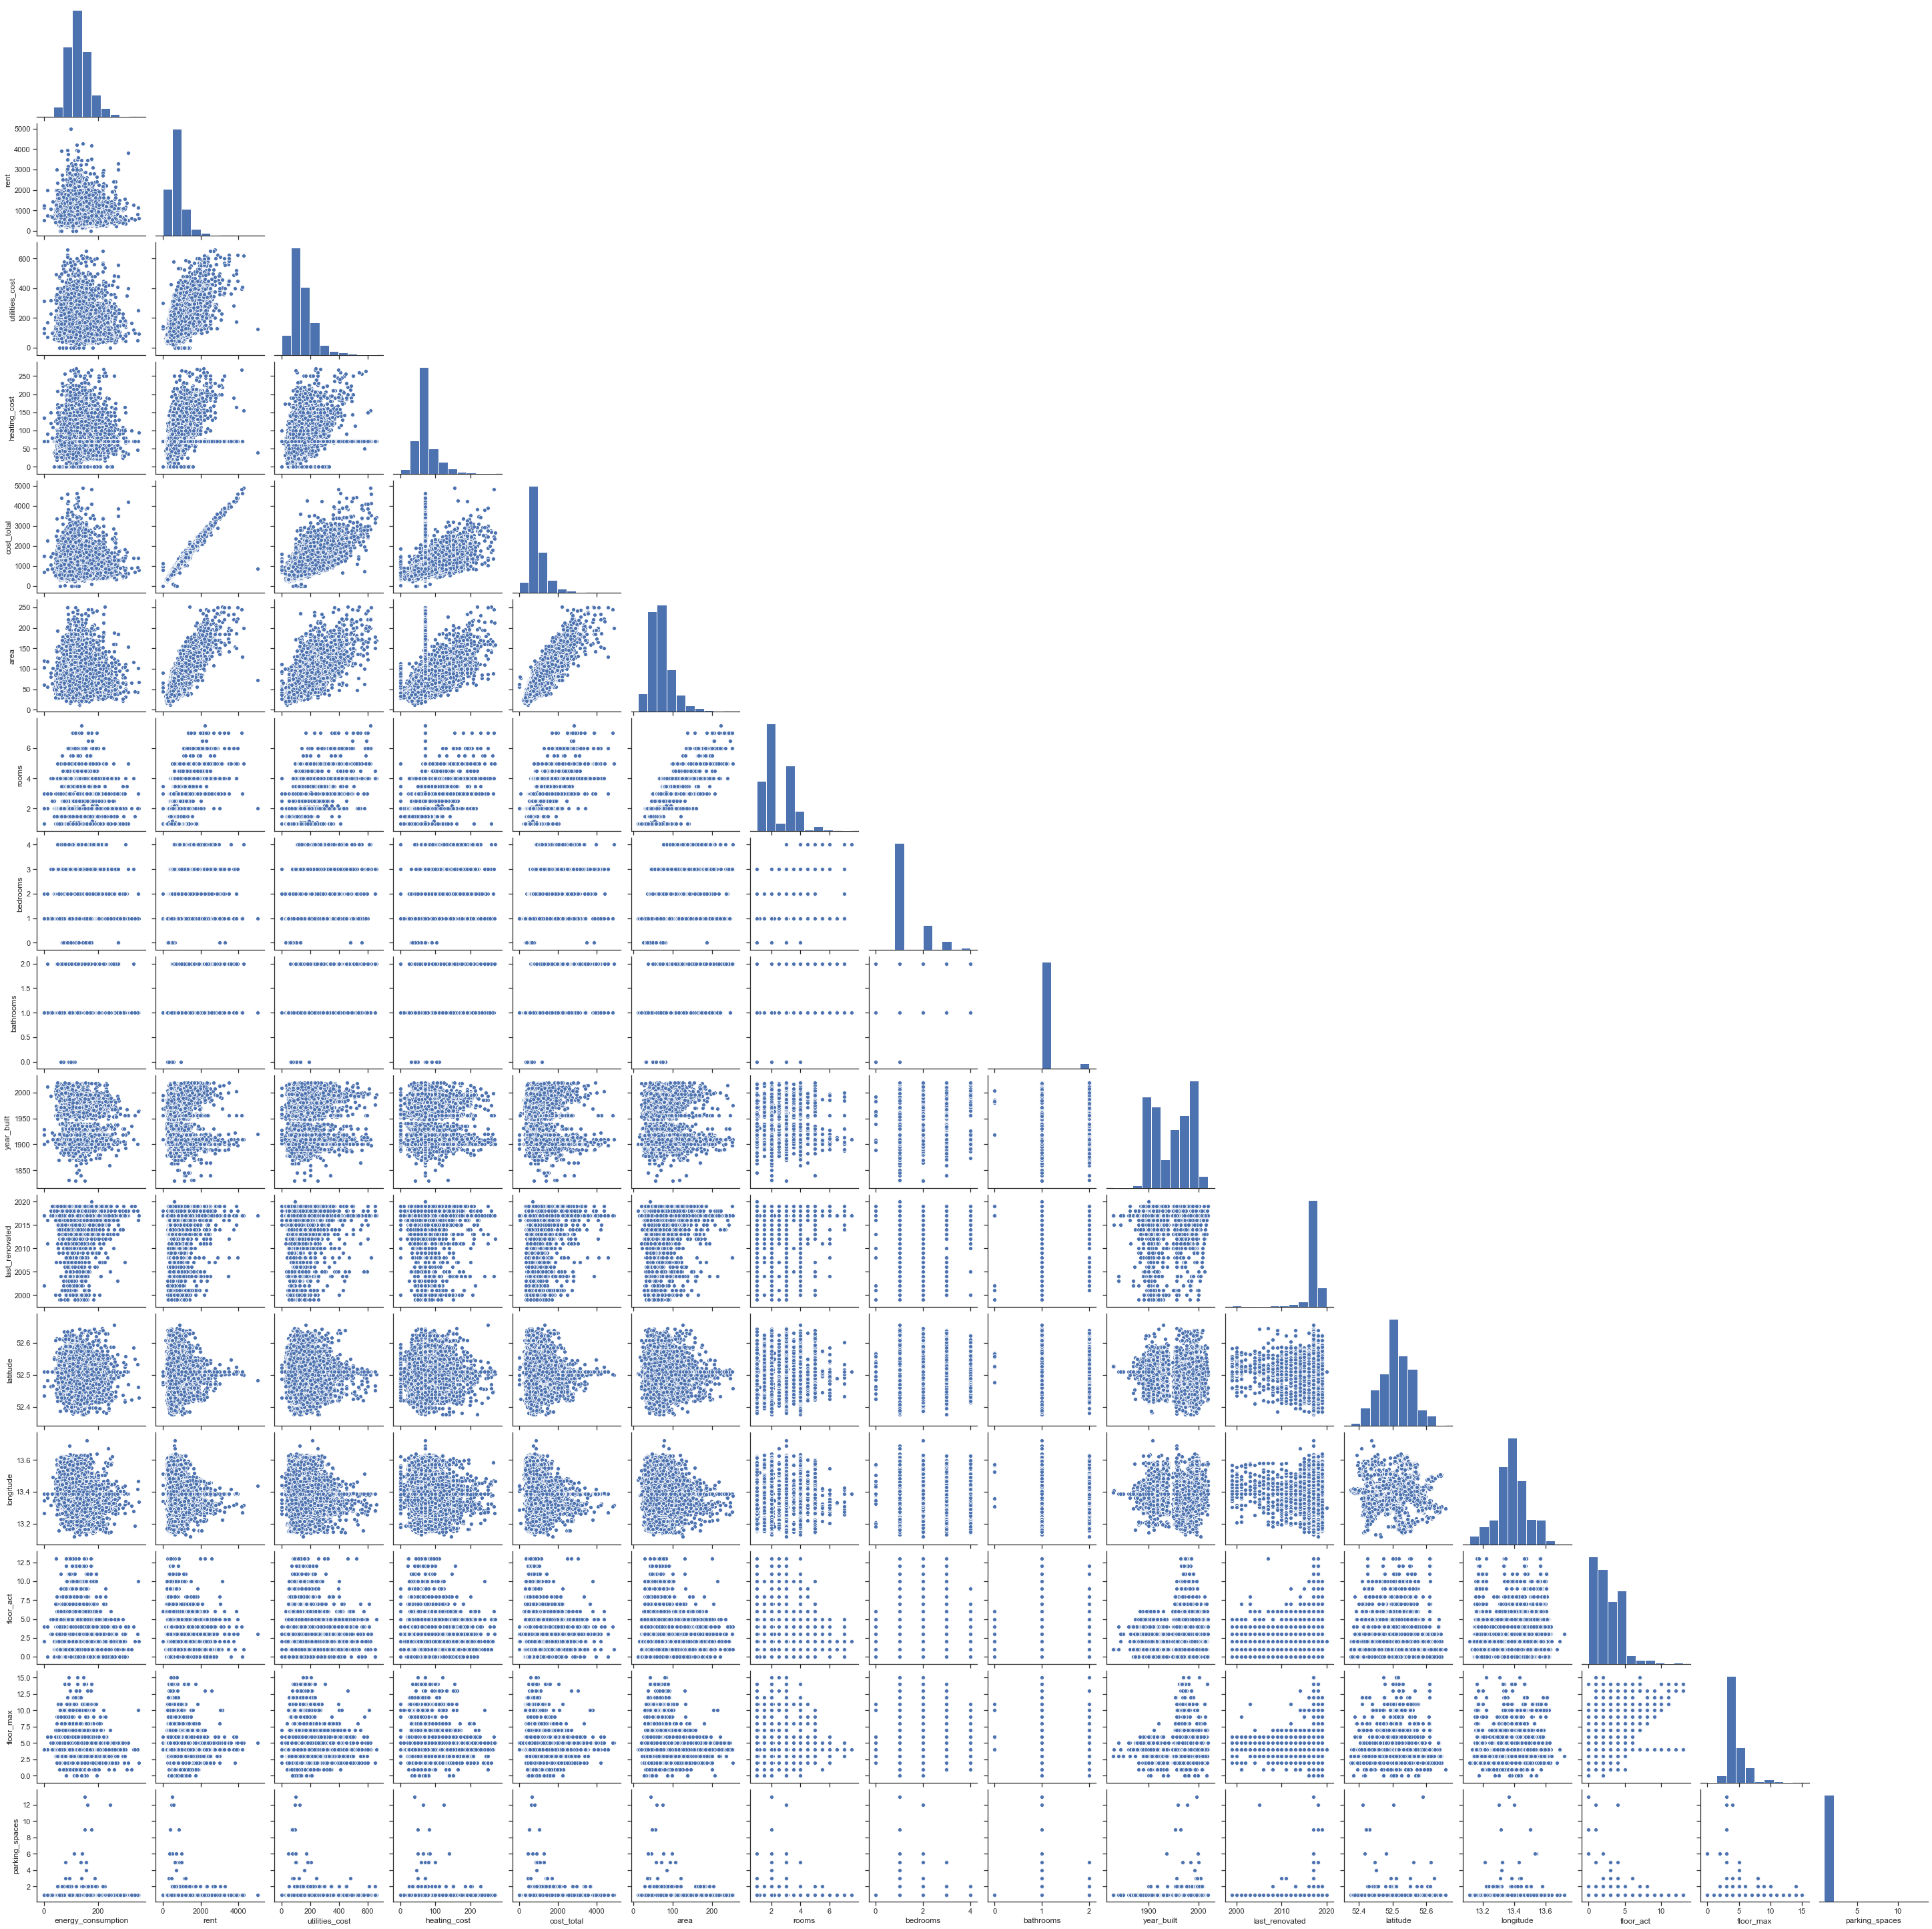

In [129]:
_ = sns.pairplot(df_num, corner=True)
plt.show()

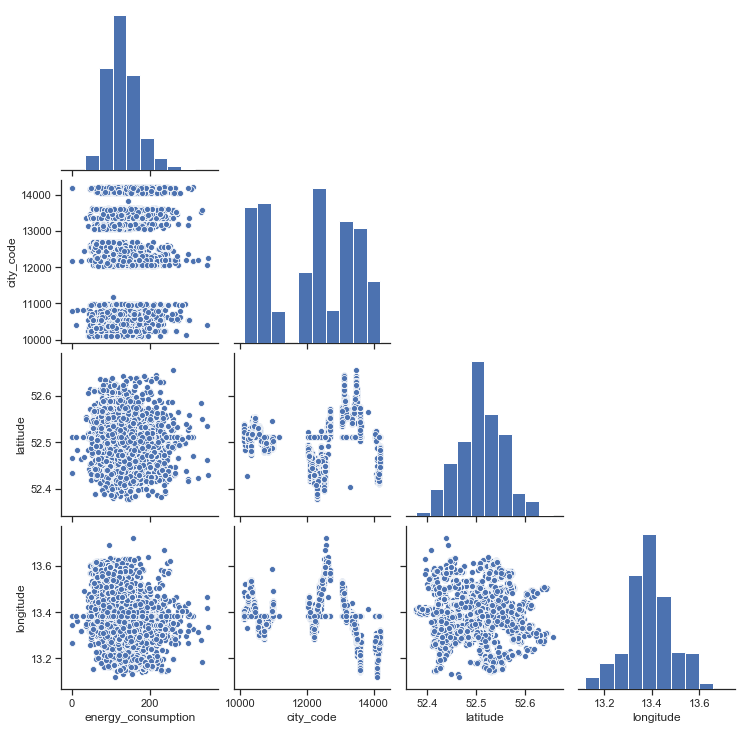

In [137]:
_ = sns.pairplot(df[['energy_consumption', 'city_code',
                     'latitude','longitude']], corner=True)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


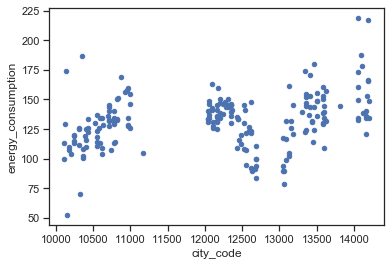

In [138]:
df_codes = df[['city_code','energy_consumption']].set_index('city_code')
df_codes_fin=df_codes.groupby(level='city_code').mean().reset_index()



df_codes_fin.plot(x= 'city_code', y='energy_consumption', kind='scatter')

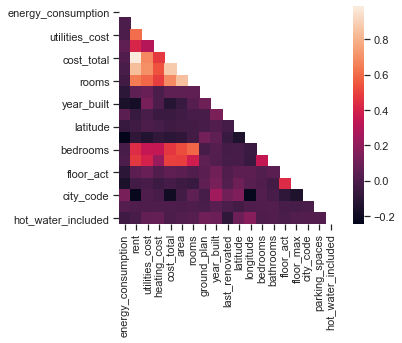

In [130]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_ = sns.heatmap(corr, mask = mask, square=True)
plt.show()

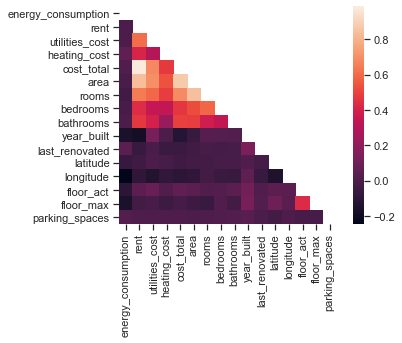

In [131]:
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_ = sns.heatmap(corr, mask = mask, square=True)
plt.show()

In [132]:
def cat_printer(df, cols):
    """
    erwartet df und Liste. Printet die dummies der categorials als heatmap. 
    """
    for col in cols:
        dummies = pd.get_dummies(df[col])
        df_dummies = pd.concat([df.energy_consumption, dummies], axis=1)
        corr = df_dummies.corr()
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        _ = sns.heatmap(corr,linewidths=.5, mask = mask, square=True)
        plt.title(col)
        plt.show()

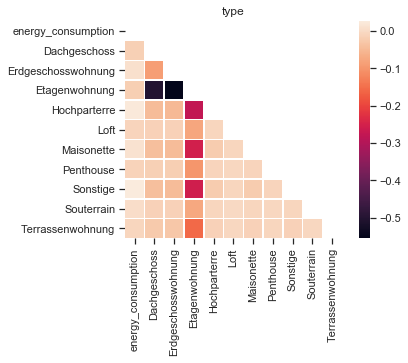

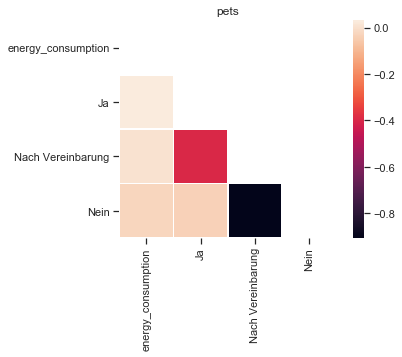

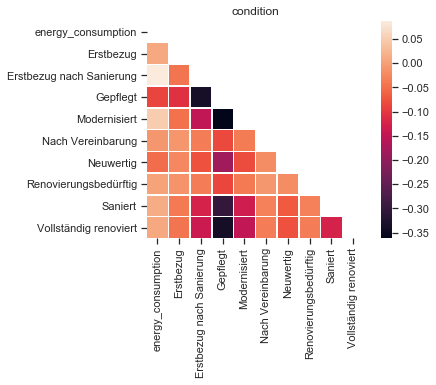

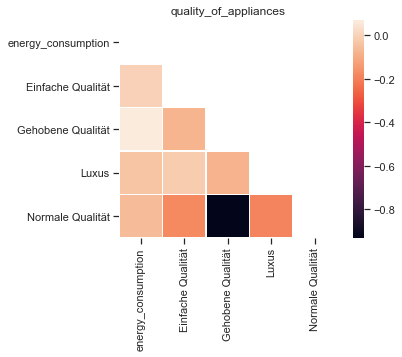

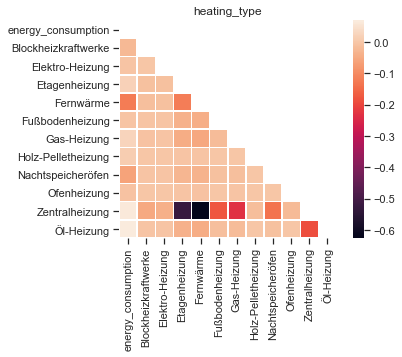

C:\Users\test\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\test\anaconda3\lib\site-packages\seaborn\matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


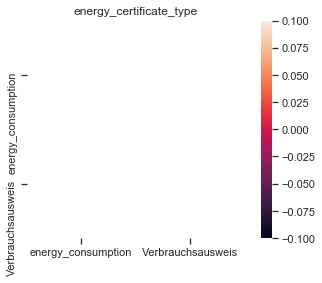

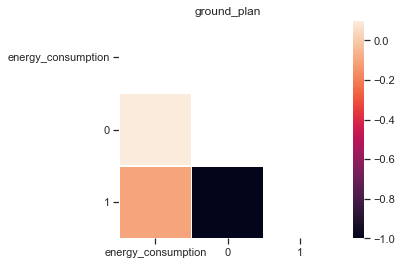

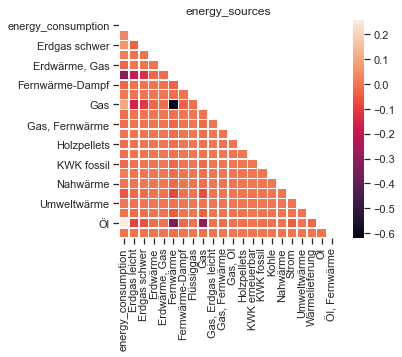

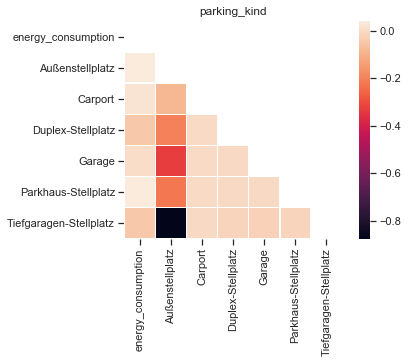

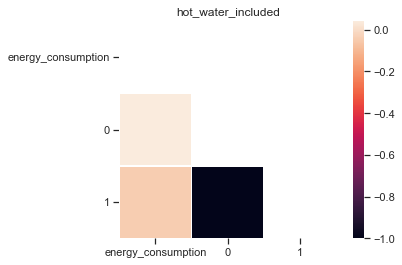

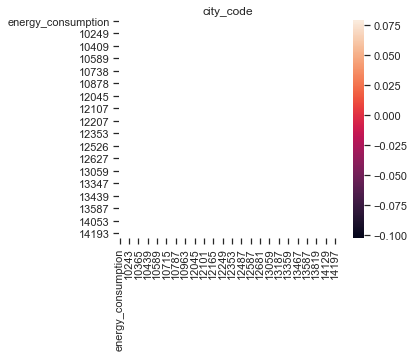

In [133]:
cat_printer(df, categorials)

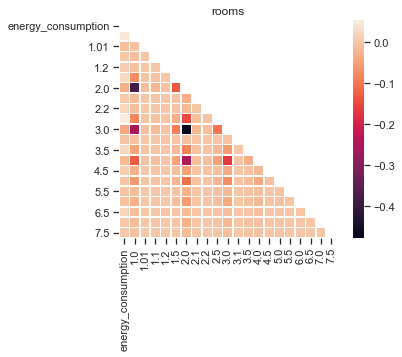

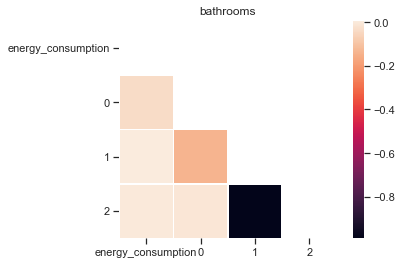

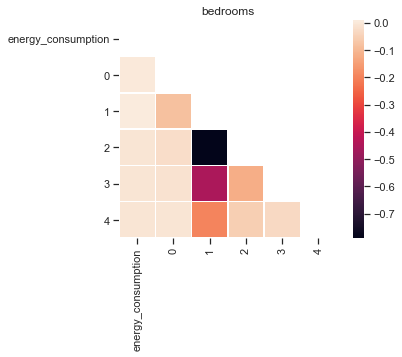

In [134]:
#cat_printer für nums mit kleiner Ausprägungszahl: 

cat_printer(df, ['rooms','bathrooms','bedrooms'])